In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


#from sklearn import datasets
from sklearn.model_selection import cross_val_score # for cross validation purpose
from sklearn.model_selection import cross_validate # for cross validation and multiple evaluation
from sklearn.metrics import confusion_matrix

In [5]:
horse = pd.read_csv(r"C:\Users\MY PC\Downloads\horseRacing.csv")

In [6]:
horse

,race_id,horse_id,1-101,1-102,1-103,1-104,1-105,1-106,1-107,1-108,...,3-132,4-105,4-109,4-110,4-114,4-115,4-116,4-117,calc_position,price
0,495886,565129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.71,...,-1.16,0.0,1.87,1.87,-2.070,-1.96,-1.950,-0.30,8.0,17.0
1,495886,607093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.05,...,0.77,0.0,0.00,0.00,0.000,0.00,0.000,0.07,5.0,26.0
2,495886,637337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.97,...,-1.16,0.0,0.00,0.00,0.480,0.44,0.390,-0.86,7.0,17.0
3,495886,659819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.21,...,0.77,0.0,0.00,0.00,0.320,1.09,0.780,-0.86,1.0,4.0
4,495886,661530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.08,...,0.77,0.0,0.00,0.00,0.000,0.00,0.390,1.17,4.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98385,691981,1770390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,11.0
98386,691981,1770391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,81.0
98387,719014,901847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.71,-0.71,0.740,0.71,0.770,0.71,1.0,3.1
98388,719014,904955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.71,0.71,-0.670,-0.71,-0.640,-0.71,2.0,7.0


In [7]:
horse = horse.drop(["1-101","1-102","1-103","1-104","1-105","1-106","1-107","1-118","1-119","1-120","1-121","1-122","1-123","1-124"],axis = 1)
horse = horse.drop(["1-129","3-121","3-122","3-123","3-124"],axis = 1)
horse = horse.drop(["1-108","1-109","1-110","1-111","1-112","1-113","1-116","1-128"],axis =1)

In [8]:
horse.dropna(inplace = True)

In [9]:
horse.shape

(61347, 37)

In [10]:
horse = horse.drop_duplicates()

#horse = horse.dropna()

horse.shape

(61347, 37)

In [11]:
horse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61347 entries, 0 to 98330
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   race_id        61347 non-null  int64  
 1   horse_id       61347 non-null  int64  
 2   1-114          61347 non-null  float64
 3   1-115          61347 non-null  float64
 4   1-117          61347 non-null  float64
 5   1-125          61347 non-null  float64
 6   1-126          61347 non-null  float64
 7   1-127          61347 non-null  float64
 8   3-101          61347 non-null  float64
 9   3-102          61347 non-null  float64
 10  3-103          61347 non-null  float64
 11  3-104          61347 non-null  float64
 12  3-105          61347 non-null  float64
 13  3-106          61347 non-null  float64
 14  3-107          61347 non-null  float64
 15  3-109          61347 non-null  float64
 16  3-110          61347 non-null  float64
 17  3-114          61347 non-null  float64
 18  3-115 

In [12]:
horse.describe()

,race_id,horse_id,1-114,1-115,1-117,1-125,1-126,1-127,3-101,3-102,...,3-132,4-105,4-109,4-110,4-114,4-115,4-116,4-117,calc_position,price
count,61347.000000,6.134700e+04,61347.000000,61347.000000,61347.000000,61347.000000,61347.000000,61347.000000,61347.000000,61347.000000,...,61347.000000,61347.000000,61347.000000,61347.000000,61347.000000,61347.000000,61347.000000,61347.000000,61347.000000,61347.000000
mean,592193.582555,8.076429e+05,-0.018043,-0.021517,0.110918,-0.005322,-0.005575,0.569921,-0.028188,-0.037328,...,0.025735,-0.086383,-0.000862,-0.000947,0.066908,0.083694,0.136033,-0.002001,6.176912,20.021838
std,56091.199698,1.401771e+05,0.922401,0.922220,0.943649,0.918402,0.918370,0.994852,0.861283,0.856845,...,0.947937,0.789787,0.946064,0.946124,0.947342,0.948192,0.952400,0.946390,4.036537,24.343171
min,495886.000000,6.496000e+03,-3.390000,-2.950000,-2.620000,-2.720000,-2.790000,-2.420000,-3.960000,-2.740000,...,-2.400000,-1.790000,-3.880000,-3.180000,-3.280000,-2.960000,-2.770000,-2.400000,0.000000,0.000000
25%,542562.000000,7.377590e+05,-0.680000,-0.640000,-0.580000,-0.700000,-0.680000,0.000000,-0.600000,-0.620000,...,-0.680000,-0.540000,-0.690000,-0.670000,-0.610000,-0.600000,-0.550000,-0.700000,3.000000,6.500000
50%,589451.000000,7.910110e+05,-0.120000,-0.240000,0.000000,-0.110000,-0.095000,0.000000,-0.170000,-0.230000,...,-0.450000,-0.380000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.320000,6.000000,12.000000
75%,641141.000000,8.496540e+05,0.610000,0.560000,0.650000,0.610000,0.600000,1.290000,0.580000,0.400000,...,0.700000,0.000000,0.660000,0.650000,0.740000,0.740000,0.780000,0.540000,9.000000,23.000000
max,691538.000000,2.248560e+06,3.540000,3.880000,4.300000,3.750000,3.590000,4.300000,4.890000,4.500000,...,4.420000,4.830000,3.750000,3.910000,3.800000,4.040000,3.890000,4.260000,31.000000,301.000000


In [13]:
horse['calc_position'] = horse['calc_position'].astype('int64')

In [14]:
horse['calc_position'].value_counts()

3     6095
4     6084
2     6073
5     6072
1     6072
6     5727
7     5278
8     4460
9     3727
10    3065
11    2409
12    1796
13    1321
14     943
15     635
16     443
17     303
18     217
19     157
20     102
21      72
22      59
0       53
23      49
24      42
25      27
26      20
27      17
28      12
29      10
30       6
31       1
Name: calc_position, dtype: int64

array([[<AxesSubplot:title={'center':'1-114'}>,
        <AxesSubplot:title={'center':'1-115'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>]],
      dtype=object)

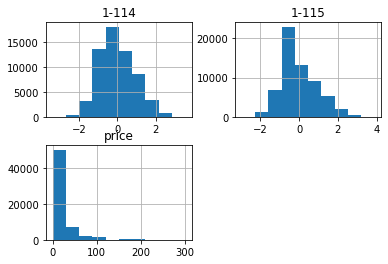

In [20]:
horse.hist(["1-114","1-115","price"])

array([[<AxesSubplot:title={'center':'4-117'}>,
        <AxesSubplot:title={'center':'4-109'}>],
       [<AxesSubplot:title={'center':'3-110'}>, <AxesSubplot:>]],
      dtype=object)

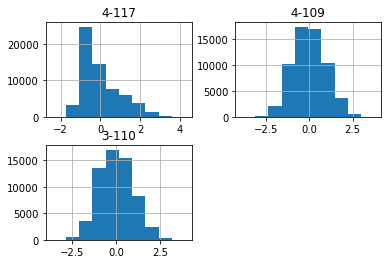

In [21]:
horse.hist(["4-117","4-109","3-110"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='calc_position', ylabel='count'>

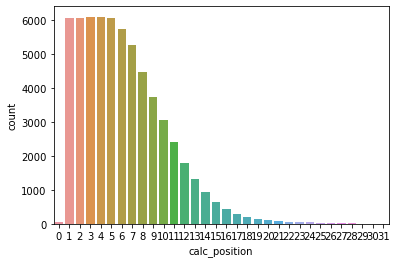

In [15]:
sns.countplot(horse.calc_position)

## Variable Selection

In [22]:
horse.columns

Index(['race_id', 'horse_id', '1-114', '1-115', '1-117', '1-125', '1-126',
       '1-127', '3-101', '3-102', '3-103', '3-104', '3-105', '3-106', '3-107',
       '3-109', '3-110', '3-114', '3-115', '3-116', '3-117', '3-118', '3-119',
       '3-120', '3-125', '3-130', '3-131', '3-132', '4-105', '4-109', '4-110',
       '4-114', '4-115', '4-116', '4-117', 'calc_position', 'price'],
      dtype='object')

In [59]:
IV = horse.drop(['race_id', 'horse_id', 'calc_position'],axis=1)


DV = horse["calc_position"]

In [77]:
IV.columns

Index(['1-114', '1-115', '1-117', '1-125', '1-126', '1-127', '3-101', '3-102',
       '3-103', '3-104', '3-105', '3-106', '3-107', '3-109', '3-110', '3-114',
       '3-115', '3-116', '3-117', '3-118', '3-119', '3-120', '3-125', '3-130',
       '3-131', '3-132', '4-105', '4-109', '4-110', '4-114', '4-115', '4-116',
       '4-117', 'price'],
      dtype='object')

In [62]:
DV.dtypes

dtype('int64')

## Standardizing data

In [30]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler = StandardScaler()
scaler.fit(IV)
IV = scaler.transform(IV)



In [65]:
IV = pd.DataFrame(IV, columns = ['1-114', '1-115', '1-117', '1-125', '1-126', '1-127', '3-101', '3-102',
       '3-103', '3-104', '3-105', '3-106', '3-107', '3-109', '3-110', '3-114',
       '3-115', '3-116', '3-117', '3-118', '3-119', '3-120', '3-125', '3-130',
       '3-131', '3-132', '4-105', '4-109', '4-110', '4-114', '4-115', '4-116',
       '4-117', 'price'])

IV

,1-114,1-115,1-117,1-125,1-126,1-127,3-101,3-102,3-103,3-104,...,3-131,3-132,4-105,4-109,4-110,4-114,4-115,4-116,4-117,price
0,-1.368134,-1.191139,2.033698,0.963988,0.539629,-0.572874,-0.489753,-0.376585,0.059672,0.078926,...,-0.018483,-1.250868,0.109375,1.977538,1.977503,-2.255707,-2.155376,-2.190309,-0.314882,-0.124136
1,-0.088853,-0.269442,0.783223,1.551971,1.486967,-1.547901,-0.373646,-0.376585,-0.366118,0.946026,...,-0.018483,0.785149,0.109375,0.000912,0.001001,-0.070628,-0.088268,-0.142833,0.076080,0.245581
2,-1.172989,-1.039330,0.147389,-0.211976,0.060515,0.402153,-0.489753,-0.376585,0.059672,0.078926,...,-1.411640,-1.250868,0.109375,0.000912,0.001001,0.436057,0.375777,0.266662,-0.906609,-0.124136
3,0.908552,0.261888,-0.710988,0.963988,0.539629,-0.572874,-0.489753,-0.376585,0.059672,0.078926,...,1.374674,0.785149,0.109375,0.000912,0.001001,0.267162,1.061298,0.676158,-0.906609,-0.658171
4,-0.403252,-0.703182,-0.488446,-0.211976,1.018742,0.402153,-0.663913,-0.831747,-1.369349,-0.788174,...,-0.018483,0.785149,0.109375,0.000912,0.001001,-0.070628,-0.088268,0.266662,1.238401,-0.534932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61342,-1.389816,-0.573060,-0.477849,1.867739,1.889858,-1.578057,0.032728,-0.610001,-0.891065,-1.618637,...,0.456457,0.226035,-0.511050,1.480739,1.057954,-0.978438,-0.826521,-0.993323,-0.314882,0.574218
61343,0.539946,1.205272,1.811156,-0.745516,-0.059263,0.432308,0.032728,-0.504964,-0.202802,0.750623,...,-1.116122,-1.039882,0.514551,-0.369045,0.001001,0.193271,0.207034,0.067165,1.058770,-0.724720
61344,0.127974,-0.963426,-0.721585,0.005795,-0.712599,-0.572874,0.032728,-1.018480,-1.019385,-0.751536,...,0.456457,1.481403,-0.637668,0.561132,1.057954,-1.115666,-1.132368,-0.993323,-0.642445,-0.370614
61345,-0.620080,-0.746556,-0.361279,-0.364416,-0.712599,-1.578057,0.032728,0.463714,0.427134,1.349045,...,-1.116122,-1.039882,-0.966873,-0.369045,-1.055952,0.056043,0.207034,0.067165,-1.234172,0.040183


## K-Fold Split

In [31]:
from sklearn.model_selection import KFold

In [67]:
kf = KFold(n_splits = 15)
print("x_train\t\tx_test\ty_train\t y_test")
for train_index, test_index in kf.split(IV, DV):
    x_train, x_test, y_train, y_test = IV.iloc[train_index], IV.iloc[test_index], DV.iloc[train_index], DV.iloc[test_index]
    print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

x_train		x_test	y_train	 y_test
(57257, 34) (4090, 34) (57257,) (4090,)
(57257, 34) (4090, 34) (57257,) (4090,)
(57257, 34) (4090, 34) (57257,) (4090,)
(57257, 34) (4090, 34) (57257,) (4090,)
(57257, 34) (4090, 34) (57257,) (4090,)
(57257, 34) (4090, 34) (57257,) (4090,)
(57257, 34) (4090, 34) (57257,) (4090,)
(57257, 34) (4090, 34) (57257,) (4090,)
(57257, 34) (4090, 34) (57257,) (4090,)
(57257, 34) (4090, 34) (57257,) (4090,)
(57257, 34) (4090, 34) (57257,) (4090,)
(57257, 34) (4090, 34) (57257,) (4090,)
(57258, 34) (4089, 34) (57258,) (4089,)
(57258, 34) (4089, 34) (57258,) (4089,)
(57258, 34) (4089, 34) (57258,) (4089,)


In [68]:
print('df shape is: ', horse.shape)
print('x_train shape is: ',x_train.shape)
print('x_test shape is: ',x_test.shape)
print('y_train shape is: ',y_train.shape)
print('y_test shape is: ',y_test.shape)

df shape is:  (61347, 37)
x_train shape is:  (57258, 34)
x_test shape is:  (4089, 34)
y_train shape is:  (57258,)
y_test shape is:  (4089,)


In [69]:
accuracy_score_list = []

def classfication_evaluation(prediction, y_test):
    #%memit
    
    actual_predicted = pd.DataFrame(data= [prediction, y_test], index = ['predicted_value', 'actual_value']).transpose()
    cm = metrics.confusion_matrix(actual_predicted.actual_value, actual_predicted.predicted_value)
    accuracy_score = metrics.accuracy_score(actual_predicted.actual_value, actual_predicted.predicted_value)
    print('\n accuracy score \t\t', accuracy_score)
    accuracy_score_list.append(accuracy_score)
    print('\n confusion matrix', cm, sep = '\n\n')
    print('\n\n', metrics.classification_report(actual_predicted.actual_value, actual_predicted.predicted_value))
    
    tp, fn, fp, tn = confusion_matrix(actual_predicted.actual_value, actual_predicted.predicted_value).ravel()
    print('Number of true positives are :',tp)
    print('Number of false negatives are :',fn)
    print('Number of false positives are :',fp)
    print('Number of true negatives are :',tn)
    
    
    # draw heatmap of confusion matrix
    sns.heatmap(cm, annot=True, square=True, annot_kws = {'wrap': False ,'size': 15, 'rotation': 45},
            fmt='g',
            xticklabels=['Yes', 'No'],
            yticklabels=['Yes', 'No'],
            robust = True,
            cmap="YlGnBu",
            linewidths=5, linecolor='grey',
            cbar=True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix', fontdict={'fontsize': 15}, pad = 15)
    

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score # for cross validation purpose
from sklearn.model_selection import cross_validate # for cross validation and multiple evaluation
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.21      0.68      0.32       399
           2       0.13      0.14      0.13       400
           3       0.13      0.12      0.13       402
           4       0.11      0.10      0.11       398
           5       0.10      0.14      0.11       396
           6       0.09      0.10      0.10       376
           7       0.13      0.14      0.13       353
           8       0.09      0.05      0.06       301
           9       0.05      0.01      0.01       246
          10       0.10      0.04      0.06       208
          11       0.05      0.01      0.01       163
          12       0.00      0.00      0.00       124
          13       0.00      0.00      0.00        97
          14       0.00      0.00      0.00        73
          15       0.00      0.00      0.00        44
          16       0.00      0.00      0.00        32
          17       0.00      0.00      0.00        23
          18       0.00    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

In [89]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
from sklearn.metrics import accuracy_score
KNAcc = accuracy_score(y_pred,y_test)
print('KNeighborsClassifier accuracy is: {:.2f}%'.format(KNAcc*100))

              precision    recall  f1-score   support

           1       0.18      0.44      0.26       399
           2       0.10      0.12      0.11       400
           3       0.10      0.10      0.10       402
           4       0.12      0.15      0.13       398
           5       0.10      0.24      0.15       396
           6       0.10      0.11      0.11       376
           7       0.10      0.09      0.10       353
           8       0.08      0.03      0.04       301
           9       0.14      0.01      0.02       246
          10       0.00      0.00      0.00       208
          11       0.00      0.00      0.00       163
          12       0.00      0.00      0.00       124
          13       0.00      0.00      0.00        97
          14       0.00      0.00      0.00        73
          15       0.00      0.00      0.00        44
          16       0.00      0.00      0.00        32
          17       0.00      0.00      0.00        23
          18       0.00    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

RFAcc = accuracy_score(y_pred,y_test)
print('RFC accuracy is: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

           1       0.24      0.44      0.31       399
           2       0.15      0.21      0.18       400
           3       0.12      0.12      0.12       402
           4       0.11      0.12      0.12       398
           5       0.12      0.16      0.14       396
           6       0.09      0.11      0.10       376
           7       0.10      0.12      0.11       353
           8       0.10      0.09      0.10       301
           9       0.08      0.05      0.07       246
          10       0.09      0.03      0.05       208
          11       0.11      0.03      0.05       163
          12       0.08      0.01      0.01       124
          13       0.00      0.00      0.00        97
          14       0.00      0.00      0.00        73
          15       0.00      0.00      0.00        44
          16       0.00      0.00      0.00        32
          17       0.00      0.00      0.00        23
          18       0.00    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
horse

,race_id,horse_id,1-114,1-115,1-117,1-125,1-126,1-127,3-101,3-102,...,3-132,4-105,4-109,4-110,4-114,4-115,4-116,4-117,calc_position,price
0,495886,565129,-1.28,-1.12,2.03,0.88,0.49,0.00,-0.45,-0.36,...,-1.16,0.00,1.87,1.87,-2.07,-1.96,-1.95,-0.30,8,17.00
1,495886,607093,-0.10,-0.27,0.85,1.42,1.36,-0.97,-0.35,-0.36,...,0.77,0.00,0.00,0.00,0.00,0.00,0.00,0.07,5,26.00
2,495886,637337,-1.10,-0.98,0.25,-0.20,0.05,0.97,-0.45,-0.36,...,-1.16,0.00,0.00,0.00,0.48,0.44,0.39,-0.86,7,17.00
3,495886,659819,0.82,0.22,-0.56,0.88,0.49,0.00,-0.45,-0.36,...,0.77,0.00,0.00,0.00,0.32,1.09,0.78,-0.86,1,4.00
4,495886,661530,-0.39,-0.67,-0.35,-0.20,0.93,0.97,-0.60,-0.75,...,0.77,0.00,0.00,0.00,0.00,0.00,0.39,1.17,4,7.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98326,691538,856440,-1.30,-0.55,-0.34,1.71,1.73,-1.00,0.00,-0.56,...,0.24,-0.49,1.40,1.00,-0.86,-0.70,-0.81,-0.30,3,34.00
98327,691538,859919,0.48,1.09,1.82,-0.69,-0.06,1.00,0.00,-0.47,...,-0.96,0.32,-0.35,0.00,0.25,0.28,0.20,1.00,1,2.38
98328,691538,861917,0.10,-0.91,-0.57,0.00,-0.66,0.00,0.00,-0.91,...,1.43,-0.59,0.53,1.00,-0.99,-0.99,-0.81,-0.61,2,11.00
98329,691538,879810,-0.59,-0.71,-0.23,-0.34,-0.66,-1.00,0.00,0.36,...,-0.96,-0.85,-0.35,-1.00,0.12,0.28,0.20,-1.17,3,21.00


# Regression 

In [17]:
HD = pd.get_dummies(horse, columns=['calc_position'], drop_first=True)

In [18]:
HD

,race_id,horse_id,1-114,1-115,1-117,1-125,1-126,1-127,3-101,3-102,...,calc_position_22,calc_position_23,calc_position_24,calc_position_25,calc_position_26,calc_position_27,calc_position_28,calc_position_29,calc_position_30,calc_position_31
0,495886,565129,-1.28,-1.12,2.03,0.88,0.49,0.00,-0.45,-0.36,...,0,0,0,0,0,0,0,0,0,0
1,495886,607093,-0.10,-0.27,0.85,1.42,1.36,-0.97,-0.35,-0.36,...,0,0,0,0,0,0,0,0,0,0
2,495886,637337,-1.10,-0.98,0.25,-0.20,0.05,0.97,-0.45,-0.36,...,0,0,0,0,0,0,0,0,0,0
3,495886,659819,0.82,0.22,-0.56,0.88,0.49,0.00,-0.45,-0.36,...,0,0,0,0,0,0,0,0,0,0
4,495886,661530,-0.39,-0.67,-0.35,-0.20,0.93,0.97,-0.60,-0.75,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98326,691538,856440,-1.30,-0.55,-0.34,1.71,1.73,-1.00,0.00,-0.56,...,0,0,0,0,0,0,0,0,0,0
98327,691538,859919,0.48,1.09,1.82,-0.69,-0.06,1.00,0.00,-0.47,...,0,0,0,0,0,0,0,0,0,0
98328,691538,861917,0.10,-0.91,-0.57,0.00,-0.66,0.00,0.00,-0.91,...,0,0,0,0,0,0,0,0,0,0
98329,691538,879810,-0.59,-0.71,-0.23,-0.34,-0.66,-1.00,0.00,0.36,...,0,0,0,0,0,0,0,0,0,0


In [19]:
HD.columns

Index(['race_id', 'horse_id', '1-114', '1-115', '1-117', '1-125', '1-126',
       '1-127', '3-101', '3-102', '3-103', '3-104', '3-105', '3-106', '3-107',
       '3-109', '3-110', '3-114', '3-115', '3-116', '3-117', '3-118', '3-119',
       '3-120', '3-125', '3-130', '3-131', '3-132', '4-105', '4-109', '4-110',
       '4-114', '4-115', '4-116', '4-117', 'price', 'calc_position_1',
       'calc_position_2', 'calc_position_3', 'calc_position_4',
       'calc_position_5', 'calc_position_6', 'calc_position_7',
       'calc_position_8', 'calc_position_9', 'calc_position_10',
       'calc_position_11', 'calc_position_12', 'calc_position_13',
       'calc_position_14', 'calc_position_15', 'calc_position_16',
       'calc_position_17', 'calc_position_18', 'calc_position_19',
       'calc_position_20', 'calc_position_21', 'calc_position_22',
       'calc_position_23', 'calc_position_24', 'calc_position_25',
       'calc_position_26', 'calc_position_27', 'calc_position_28',
       'calc_position_

In [22]:
HD["calc_position_29"].value_counts()

0    61337
1       10
Name: calc_position_29, dtype: int64

In [27]:
HD= HD.drop(['calc_position_31','calc_position_30','calc_position_29','calc_position_14', 'calc_position_15'
           , 'calc_position_16',
       'calc_position_17', 'calc_position_18', 'calc_position_19',
       'calc_position_20', 'calc_position_21', 'calc_position_22',
       'calc_position_23', 'calc_position_24', 'calc_position_25',
       'calc_position_26', 'calc_position_27', 'calc_position_28'],axis=1)


KeyError: "['calc_position_31' 'calc_position_30' 'calc_position_29'\n 'calc_position_14' 'calc_position_15' 'calc_position_16'\n 'calc_position_17' 'calc_position_18' 'calc_position_19'\n 'calc_position_20' 'calc_position_21' 'calc_position_22'\n 'calc_position_23' 'calc_position_24' 'calc_position_25'\n 'calc_position_26' 'calc_position_27' 'calc_position_28'] not found in axis"

In [ ]:
## Standardization

In [33]:
scaler = StandardScaler()
scaler.fit(HD)
HD = scaler.transform(HD)

In [35]:
data = pd.DataFrame(HD, columns = ['race_id', 'horse_id', '1-114', '1-115', '1-117', '1-125', '1-126',
       '1-127', '3-101', '3-102', '3-103', '3-104', '3-105', '3-106', '3-107',
       '3-109', '3-110', '3-114', '3-115', '3-116', '3-117', '3-118', '3-119',
       '3-120', '3-125', '3-130', '3-131', '3-132', '4-105', '4-109', '4-110',
       '4-114', '4-115', '4-116', '4-117', 'price', 'calc_position_1',
       'calc_position_2', 'calc_position_3', 'calc_position_4',
       'calc_position_5', 'calc_position_6', 'calc_position_7',
       'calc_position_8', 'calc_position_9', 'calc_position_10',
       'calc_position_11', 'calc_position_12', 'calc_position_13'])

In [36]:
data

,race_id,horse_id,1-114,1-115,1-117,1-125,1-126,1-127,3-101,3-102,...,calc_position_4,calc_position_5,calc_position_6,calc_position_7,calc_position_8,calc_position_9,calc_position_10,calc_position_11,calc_position_12,calc_position_13
0,-1.716996,-1.730068,-1.368134,-1.191139,2.033698,0.963988,0.539629,-0.572874,-0.489753,-0.376585,...,-0.331801,-0.331437,-0.320884,-0.306813,3.571405,-0.254327,-0.229323,-0.202172,-0.173664,-0.148348
1,-1.716996,-1.430701,-0.088853,-0.269442,0.783223,1.551971,1.486967,-1.547901,-0.373646,-0.376585,...,-0.331801,3.017161,-0.320884,-0.306813,-0.280002,-0.254327,-0.229323,-0.202172,-0.173664,-0.148348
2,-1.716996,-1.214944,-1.172989,-1.039330,0.147389,-0.211976,0.060515,0.402153,-0.489753,-0.376585,...,-0.331801,-0.331437,-0.320884,3.259318,-0.280002,-0.254327,-0.229323,-0.202172,-0.173664,-0.148348
3,-1.716996,-1.054560,0.908552,0.261888,-0.710988,0.963988,0.539629,-0.572874,-0.489753,-0.376585,...,-0.331801,-0.331437,-0.320884,-0.306813,-0.280002,-0.254327,-0.229323,-0.202172,-0.173664,-0.148348
4,-1.716996,-1.042354,-0.403252,-0.703182,-0.488446,-0.211976,1.018742,0.402153,-0.663913,-0.831747,...,3.013857,-0.331437,-0.320884,-0.306813,-0.280002,-0.254327,-0.229323,-0.202172,-0.173664,-0.148348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61342,1.771137,0.348113,-1.389816,-0.573060,-0.477849,1.867739,1.889858,-1.578057,0.032728,-0.610001,...,-0.331801,-0.331437,-0.320884,-0.306813,-0.280002,-0.254327,-0.229323,-0.202172,-0.173664,-0.148348
61343,1.771137,0.372932,0.539946,1.205272,1.811156,-0.745516,-0.059263,0.432308,0.032728,-0.504964,...,-0.331801,-0.331437,-0.320884,-0.306813,-0.280002,-0.254327,-0.229323,-0.202172,-0.173664,-0.148348
61344,1.771137,0.387185,0.127974,-0.963426,-0.721585,0.005795,-0.712599,-0.572874,0.032728,-1.018480,...,-0.331801,-0.331437,-0.320884,-0.306813,-0.280002,-0.254327,-0.229323,-0.202172,-0.173664,-0.148348
61345,1.771137,0.514832,-0.620080,-0.746556,-0.361279,-0.364416,-0.712599,-1.578057,0.032728,0.463714,...,-0.331801,-0.331437,-0.320884,-0.306813,-0.280002,-0.254327,-0.229323,-0.202172,-0.173664,-0.148348


In [37]:
independent = data.drop(['race_id', 'horse_id','price'],axis=1)
dependent = data["price"]

In [40]:
dependent

0       -0.124136
1        0.245581
2       -0.124136
3       -0.658171
4       -0.534932
           ...   
61342    0.574218
61343   -0.724720
61344   -0.370614
61345    0.040183
61346   -0.747314
Name: price, Length: 61347, dtype: float64

In [41]:
kf = KFold(n_splits = 15)
for train_index, test_index in kf.split(independent, dependent):
    x_train, x_test, y_train, y_test = independent.iloc[train_index], independent.iloc[test_index], dependent.iloc[train_index], dependent.iloc[test_index]
    print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(57257, 46) (4090, 46) (57257,) (4090,)
(57257, 46) (4090, 46) (57257,) (4090,)
(57257, 46) (4090, 46) (57257,) (4090,)
(57257, 46) (4090, 46) (57257,) (4090,)
(57257, 46) (4090, 46) (57257,) (4090,)
(57257, 46) (4090, 46) (57257,) (4090,)
(57257, 46) (4090, 46) (57257,) (4090,)
(57257, 46) (4090, 46) (57257,) (4090,)
(57257, 46) (4090, 46) (57257,) (4090,)
(57257, 46) (4090, 46) (57257,) (4090,)
(57257, 46) (4090, 46) (57257,) (4090,)
(57257, 46) (4090, 46) (57257,) (4090,)
(57258, 46) (4089, 46) (57258,) (4089,)
(57258, 46) (4089, 46) (57258,) (4089,)
(57258, 46) (4089, 46) (57258,) (4089,)


In [131]:
print('df shape is: ', data.shape)
print('x_train shape is: ',x_train.shape)
print('x_test shape is: ',x_test.shape)
print('y_train shape is: ',y_train.shape)
print('y_test shape is: ',y_test.shape)

df shape is:  (55216, 67)
x_train shape is:  (51535, 64)
x_test shape is:  (3681, 64)
y_train shape is:  (51535,)
y_test shape is:  (3681,)


In [42]:
MAE_list=[]
MSE_list=[]
RMSE_list=[]
R_Squared_list=[]


def model_evaluation(y_test, predictions):
    mae = metrics.mean_absolute_error(y_test, predictions)
    mse = metrics.mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse) # or mse**(0.5)  
    r2 = metrics.r2_score(y_test,predictions)
    
    MAE_list.append(mae)
    MSE_list.append(mse)
    RMSE_list.append(rmse)
    R_Squared_list.append(r2)
    
    print("Results of sklearn.metrics: \n")
    print("MAE:",mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R-Squared:", r2)

In [43]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
predictions_dtr= dtr.predict(x_test)


In [44]:
model_evaluation(y_test, predictions_dtr)

Results of sklearn.metrics: 

MAE: 0.6353601397866901
MSE: 1.3293799196789535
RMSE: 1.1529873892107205
R-Squared: -0.15202960533105458


In [45]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
predictions_rf = rfr.predict(x_test)

In [46]:
model_evaluation(y_test, predictions_rf)

Results of sklearn.metrics: 

MAE: 0.4874770788549077
MSE: 0.7454025774357702
RMSE: 0.8633670004324755
R-Squared: 0.35404031279224957
